In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [9]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
print(train_data.columns)
train_data.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


0    549
1    342
Name: Survived, dtype: int64
Graphic representation of train data : target survived


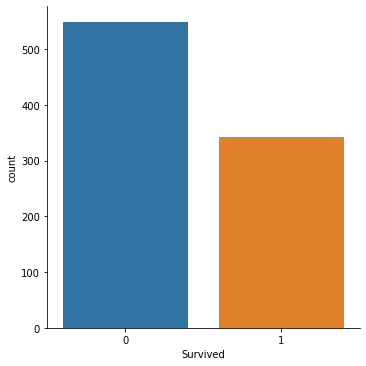

In [34]:
print(train_data.Survived.value_counts())
print('Graphic representation of train data : target survived')
sns.catplot(x='Survived', kind='count', data = train_data)

male      577
female    314
Name: Sex, dtype: int64
% of women who survived = 0.742038
% of men who survived = 0.188908
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64
Graphic representation of train data : Sex influence on survival


<AxesSubplot:xlabel='Sex', ylabel='count'>

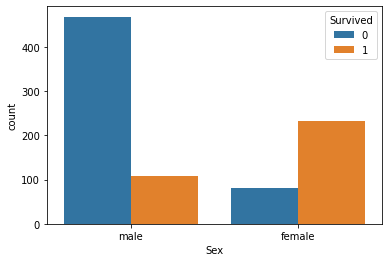

In [48]:
print(train_data.Sex.value_counts())
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived = {:f}".format(rate_women))
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived = {:f}".format(rate_men))
print(train_data.groupby('Sex').Survived.value_counts())
print('Graphic representation of train data : Sex influence on survival')
sns.countplot(x='Sex', hue='Survived', data=train_data)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64
Graphic representation of train data : Pclass influence on survival


<AxesSubplot:xlabel='Pclass', ylabel='count'>

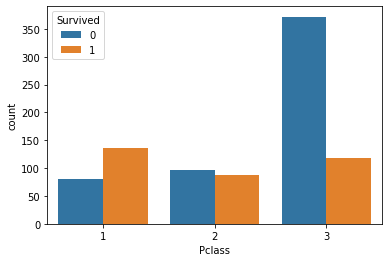

In [49]:
print(train_data.groupby('Pclass').Survived.value_counts())
print('Graphic representation of train data : Pclass influence on survival')
sns.countplot(x='Pclass', hue='Survived', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

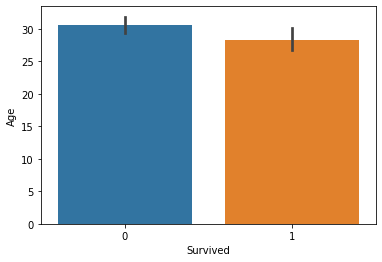

In [29]:
sns.barplot(y='Age', x='Survived', data=train_data)

Graphic representation of test data : sex


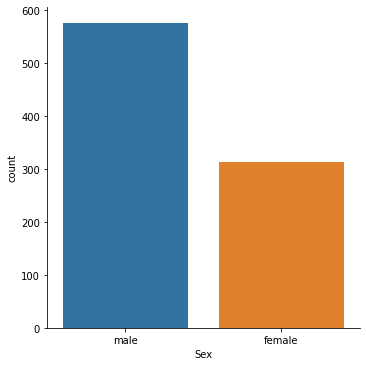

In [31]:
print('Graphic representation of test data : sex')
sns.catplot(x='Sex', kind='count', data = train_data)

In [ ]:
train_data.groupby('Survived').Pclass.value_counts()

In [ ]:
firstClass = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_firstClass = sum(firstClass)/len(firstClass)
scdClass = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_scdClass = sum(scdClass)/len(scdClass)
thdClass = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_thdClass = sum(thdClass)/len(thdClass)
print("% of 1st class who survived: {}\n% of 2nd class who survived: {}\n% of 3rd class who survived: {}".format(rate_firstClass,rate_scdClass,rate_thdClass))

In [ ]:
train_num=train_data.select_dtypes(exclude=['object'])

In [ ]:
def assignSexValue(row):
    if row.Sex=='male':
        return 1
    else:
        return 0
train_dataAssignSexValue = train_data.apply(assignSexValue,axis='columns')

In [ ]:
train_data['Sex']=train_dataAssignSexValue

In [ ]:
train_num=train_data.select_dtypes(exclude=['object'])

In [ ]:
train_num

In [ ]:
y=train_num.Survived
X=train_num.drop(["PassengerId","Survived"], axis=1)
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
model.fit(imputed_X_train, y_train)
train_pred=model.predict(imputed_X_train)
predictions = model.predict(imputed_X_valid)

In [ ]:
from sklearn.metrics import accuracy_score
print("train score = ",accuracy_score(y_train, train_pred))
print("test score = ",accuracy_score(y_valid, predictions))

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_values = { 'n_estimators': [1,2,5,10,50,100,250,500], 'max_depth': [1,2,3,4,5,6,7,8,9,10] }
grid_clf_acc = GridSearchCV(model, param_grid = grid_values)
grid_clf_acc.fit(imputed_X_train, y_train)

In [ ]:
train_pred=grid_clf_acc.predict(imputed_X_train)
predictions = grid_clf_acc.predict(imputed_X_valid)
print("train score = ",accuracy_score(y_train, train_pred))
print("test score = ",accuracy_score(y_valid, predictions))

In [ ]:
imputed_X=pd.DataFrame(my_imputer.transform(X))
imputed_X.columns = X.columns
grid_clf_acc.fit(imputed_X, y)
Xpred=grid_clf_acc.predict(imputed_X)
print("accuracy score = ",accuracy_score(y, Xpred))

In [ ]:
test_dataAssignSexValue = test_data.apply(assignSexValue,axis='columns')
test_data['Sex']=test_dataAssignSexValue
test_data.head()

In [ ]:
test_num=test_data.select_dtypes(exclude=['object'])
test_num


In [ ]:
X_test=test_num.drop(["PassengerId"], axis=1)
X_test

In [ ]:
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))
imputed_X_test.columns = X_valid.columns
predictionsX_test = grid_clf_acc.predict(imputed_X_test)


In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictionsX_test})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")